In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
# Data cleaning
# check null values and process them
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
# Check all categorical data
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [6]:
df['MaritalStatus'].value_counts()
# Single and Unmarried are same category

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [8]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [9]:
# Check the missing values and find the %%
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [10]:
for feature in features_with_na:
    print(f'{feature} has : ',np.round(df[feature].isnull().mean()*100,5), '% missing value')

Age has :  4.62357 % missing value
TypeofContact has :  0.51146 % missing value
DurationOfPitch has :  5.13502 % missing value
NumberOfFollowups has :  0.92062 % missing value
PreferredPropertyStar has :  0.53191 % missing value
NumberOfTrips has :  2.86416 % missing value
NumberOfChildrenVisiting has :  1.35025 % missing value
MonthlyIncome has :  4.76678 % missing value


In [11]:
# Statistics on numerical columns (cols with null values)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
df.select_dtypes(include='object').describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,2,5,3,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [13]:
df.select_dtypes(exclude='object').describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [14]:
# Age
df['Age'] = df['Age'].fillna(df['Age'].median())

# TypeofContact
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

# DurationOfPitch
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

# NumberOfFollowups
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])

# PreferredPropertyStar
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

# NumberOfTrips
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())

# NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])

# MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [15]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.drop('CustomerID', inplace=True, axis=1)

In [18]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0


In [19]:
#delete those columns
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'], inplace=True, axis=1)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [21]:
# get all the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
print(f'Number of numerical features are : {len(numerical_features)}')

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')
Number of numerical features are : 12


In [22]:
# get all the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(f'Number of categorical features are : {len(categorical_features)}')

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
Number of categorical features are : 6


In [23]:
# discrete features - variables or attributes in a dataset that can take on only specific, distinct values — usually countable and often integers.
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25 ]
print(f'NUmber of discrete features : {len(discrete_features)}')

NUmber of discrete features : 9


In [24]:
# Continuous features - variables that can take on any value within a given range, including decimal and fractional values. They typically represent measurements rather than counts.
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(f'Number of continuous features : {len(continuous_features)}')

Number of continuous features : 3


In [25]:
# Seperating the dependent and independent data
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [26]:
y.value_counts()
# random forest and decision tree works well with imbalanced data

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [27]:
# Train test split the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [28]:
# Create column transformer with 3 types of transformers
# Column Transformer --> A ColumnTransformer is a powerful utility in Scikit-learn that allows you 
# to apply different preprocessing steps to different columns of a dataset — all in a single, unified pipeline.
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder',oh_transformer , cat_features),
        ('StandardScaler',numeric_transformer ,num_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [30]:
# Applying transformation on training data use fit_transform
X_train = preprocessor.fit_transform(X_train)

In [31]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [32]:
# Applying transformation on test data use transform
X_test = preprocessor.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score, \
    classification_report, accuracy_score,roc_auc_score, roc_curve

In [35]:
models = {
    'Random Forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'SVC' : SVC(),
    'AdaBoost' : AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Gives all the model objects in a list so we use the i-th model
    model.fit(X_train,y_train) # Model training

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_pred,y_test_pred)

    print(list(models.keys())[i]) # Print the name of the i-th model in the list of keys of the model names

    print('Model Performance For Training Set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))
    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance For Test Set')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))
    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)

Random Forest
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9202
- F1 Score : 0.9133
- Precision : 0.9593
- Recall : 0.6178
- Roc Auc Score : 1.0000
Decision Tree
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9162
- F1 Score : 0.9153
- Precision : 0.8011
- Recall : 0.7592
- Roc Auc Score : 1.0000
SVC
Model Performance For Training Set
- Accuracy : 0.9013
- F1 Score : 0.8899
- Precision : 0.9173
- Recall : 0.5171
- Roc Auc Score : 0.7532
------------------------------------
Model Performance For Test Set
- Accuracy : 0.8650
- F1 Score : 0.8434
- Precision : 0.8471
- Recall : 0.3770
- Roc Auc Score : 1.0000
AdaBoost
Model Performance For Trai

In [37]:
# Hyperparameter Tuning 
# Hyperparameters for random forest 
# we can have different hyperparameter var for different models
rf_params = {
    'max_depth' : [5,8,15,None,10],
    'max_features' : [5,7,'auto',8],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [100,200,500,1000]
}

ada_params = {
    'n_estimators' : [50,60,70,80],
    'algorithm' : ['SAMME','SAMME.R'],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

In [38]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [39]:
ada_params

{'n_estimators': [50, 60, 70, 80],
 'algorithm': ['SAMME', 'SAMME.R'],
 'learning_rate': [0.01, 0.1, 0.5, 1.0]}

In [40]:
# Model list for hyperparameter tuning
randomcv_model = [
    ('Random Forest', RandomForestClassifier(), rf_params),  # list of tuples for model name, model object and model hyperparameters
    ('AdaBoost Classifier', AdaBoostClassifier(), ada_params),
]
randomcv_model

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AdaBoost Classifier',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80],
   'algorithm': ['SAMME', 'SAMME.R'],
   'learning_rate': [0.01, 0.1, 0.5, 1.0]})]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}  # Empty dict, This will hold the best hyperparameters for each model after tuning.

# Looping thru each model in randomcv_model
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,n_jobs=-1,
                                cv=3, n_iter=100, verbose=2,random_state=42)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_  # get the best parameters from the search and store them with the model name as key.

    for model_name in model_param :
        print(f'----------------Best Parameters for {model_name} --------------------')
        print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "e:\padhai ka saman\pyt

----------------Best Parameters for Random Forest --------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
Fitting 3 folds for each of 32 candidates, totalling 96 fits


e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params

----------------Best Parameters for Random Forest --------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
----------------Best Parameters for AdaBoost Classifier --------------------
{'n_estimators': 80, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


In [42]:
model_param

{'Random Forest': {'n_estimators': 1000,
  'min_samples_split': 2,
  'max_features': 7,
  'max_depth': None},
 'AdaBoost Classifier': {'n_estimators': 80,
  'learning_rate': 1.0,
  'algorithm': 'SAMME'}}

In [43]:
# Using the best parameters for random forest
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None),
    'AdaBoost Classifier' : AdaBoostClassifier(n_estimators=80, learning_rate=1.0, algorithm='SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Gives all the model objects in a list so we use the i-th model
    model.fit(X_train,y_train) # Model training

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test_pred,y_test_pred)

    print(list(models.keys())[i]) # Print the name of the i-th model in the list of keys of the model names

    print('Model Performance For Training Set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))
    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance For Test Set')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))
    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))

    print('='*35)

Random Forest
Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9366
- F1 Score : 0.9324
- Precision : 0.9708
- Recall : 0.6963
- Roc Auc Score : 1.0000


e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Classifier
Model Performance For Training Set
- Accuracy : 0.8465
- F1 Score : 0.8132
- Precision : 0.7699
- Recall : 0.2524
- Roc Auc Score : 0.6176
------------------------------------
Model Performance For Test Set
- Accuracy : 0.8364
- F1 Score : 0.7977
- Precision : 0.7818
- Recall : 0.2251
- Roc Auc Score : 1.0000


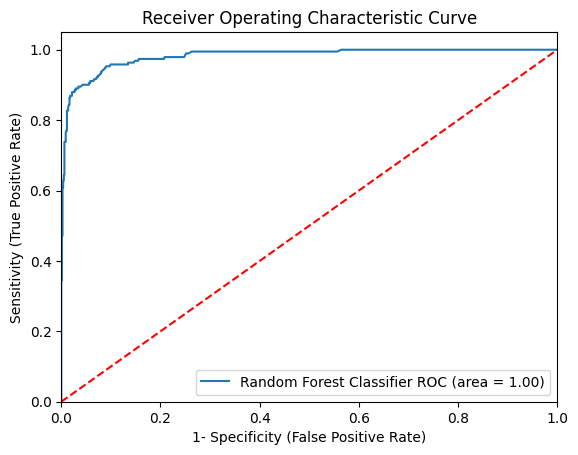

e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


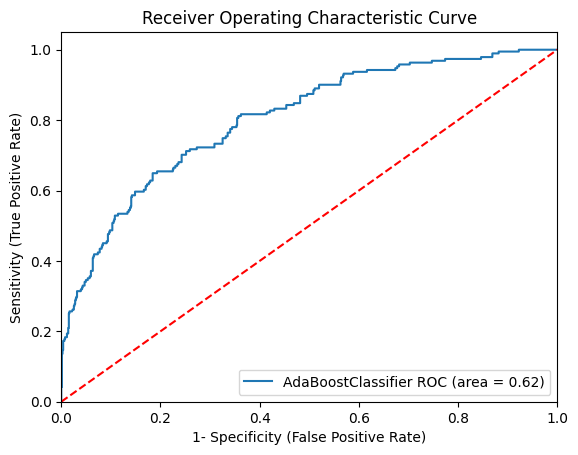

In [45]:
# Plot the ROC AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the roc plot

auc_models = [
    {
        'label' : 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None),
        'auc' : 1.0000
    },
    {
        "label" : "AdaBoostClassifier",
        "model" : AdaBoostClassifier(n_estimators=80, learning_rate=1.0, algorithm='SAMME'),
        "auc" : 0.6176
    }
]

# Create a loop through all models
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train, y_train) # Train the model
    
    # Compute false positive and True positive rate
    fpr,tpr,thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    plt.plot(fpr,tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

    # Custom settings for the plot 
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1- Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.savefig('auc.png')
    plt.show()